<a href="https://colab.research.google.com/github/jscienciadados/ciencia-dados/blob/main/Mean_Shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color ="red">Mean Shift</font>

# Estudando o algoritmo Mean Shift

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

https://docs.opencv.org/4.2.0/d7/d00/tutorial_meanshift.html

O Mean Shift é uma técnica não-paramétrica de análise de espaço de características para localizar os máximos de uma função de densidade. Pode ser usado para análise de cluster, visão computacional e processamento de imagem. Foi originalmente proposto em 1975.

Em contraste com o algoritmo K-Means, a saída do Mean Shift não depende de quaisquer suposições explícitas sobre a forma da distribuição de pontos de dados, o número de clusters ou qualquer forma de inicialização aleatória.

Uma formulação geral do algoritmo Mean Shift pode ser desenvolvida através da consideração de núcleos (Kernels) de densidade. Esta abordagem é muitas vezes referida como estimativa de densidade de kernel - um método para estimativa de densidade que muitas vezes converge mais rapidamente e que também gera uma boa estimativa contínua para a função de densidade.

Essencialmente, o Mean Shift trata o problema de agrupamento supondo que todos os pontos dados representam amostras de alguma função de densidade de probabilidade, com regiões de alta densidade de amostra correspondendo aos máximos locais desta distribuição. Para encontrar esses máximos locais, o algoritmo funciona permitindo que os pontos se atraiam, por meio do que poderia ser considerado uma espécie de "força gravitacional de curto alcance". Permitindo que os pontos gravitem para áreas de maior densidade, pode-se mostrar que eles eventualmente se unificarão em uma série de pontos, próximos aos máximos locais da distribuição. Esses pontos de dados que convergem para os mesmos máximos locais são considerados membros do mesmo cluster.

In [3]:
# Imports
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")


In [4]:
# Gera massa de dados
centers = [[1, 1], [-.75, -1], [1, -1], [-3, 2]]
X, _ = make_blobs(n_samples = 10000, centers = centers, cluster_std = 0.6)


In [5]:
# Cria o modelo

# bandwidth = Comprimento da Interação entre os exemplos, também conhecido como a largura de banda do algoritmo.
bandwidth = estimate_bandwidth(X, quantile = .1, n_samples = 500)

# Cria o modelo
modelo_v1 = MeanShift(bandwidth = bandwidth, bin_seeding = True)

# Treina o modelo
modelo_v1.fit(X)


MeanShift(bandwidth=0.8127998059559577, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [6]:
# Coleta os labels, centróides e número de clusters
labels = modelo_v1.labels_
cluster_centers = modelo_v1.cluster_centers_
n_clusters_ = labels.max()+1

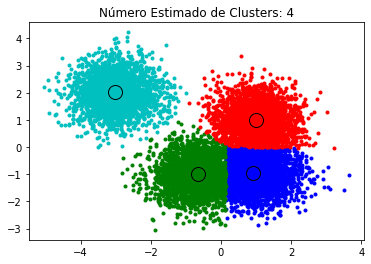

In [7]:
# Plot
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 14)

    plt.title('Número Estimado de Clusters: %d' % n_clusters_)
plt.show()


In [8]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
style.use("ggplot")


In [9]:
# Gera os dados
centers = [[1,1],[5,5],[3,10]]
X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1)


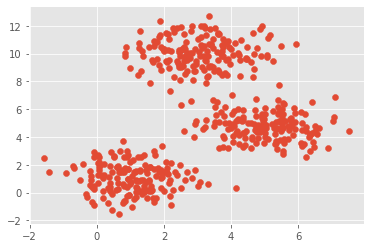

In [10]:
# Visualiza os dados
plt.scatter(X[:,0], X[:, 1])
plt.show()

In [11]:
# cria o modelo
modelo_v2 = MeanShift()

In [12]:
# fit
modelo_v2.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [13]:
# Coletando os labels, centroids e numeros de clusters
labels = modelo_v2.labels_
cluster_centers = modelo_v2.cluster_centers_
n_clusters_ = len(np.unique(labels))

In [14]:
# print
print(cluster_center)
print("------------------------------------")
print("Numero Estimado de Clusters:", n_clusters_)

[-3.01172998  2.02213727]
------------------------------------
Numero Estimado de Clusters: 3


In [15]:
# Cores
colors = 10*['r.','g.','b.','c.','k.','y.','m.']

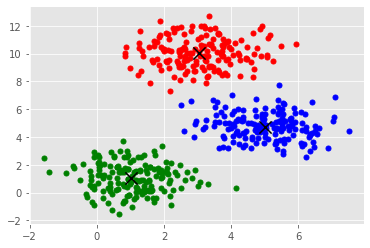

In [16]:
# Plot
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker = "x", color = 'k', s = 150, linewidths = 5, zorder = 10)
plt.show()


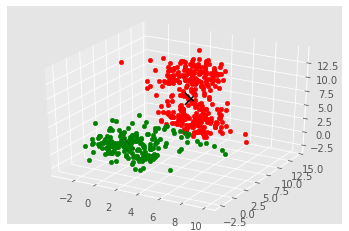

In [17]:
# Plot 3d

# Centróides e massa de dados
centers = [[1,1,1],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1.5)

# Modelo
modelo_v3 = MeanShift()
modelo_v3.fit(X)

# Extraindo labels, centróides e número de clusters
labels = modelo_v3.labels_
cluster_centers = modelo_v3.cluster_centers_
n_clusters_ = len(np.unique(labels))

# Cores
colors = 10*['r','g','b','c','k','y','m']

# Plot

# Área de plotagem
fig = plt.figure()

# Gráfico 3d
ax = fig.add_subplot(111, projection = '3d')

# Adiciona os pontos de dados ao gráficos
for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c = colors[labels[i]], marker = 'o')

# Adiciona os centróides ao gráfico
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2],
           marker = "x",
           color = 'k',
           s = 150,
           linewidths = 5,
           zorder = 10)
plt.show()
